<a href="https://colab.research.google.com/github/gui98araujo/Machine_Learning_Projects/blob/main/SistemasRecomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Recomendação #

Os sistemas de recomendação chegaram a partir de um movimento de digitalização das lojas, uma vez que as lojas físicas dos anos 80, 90 tinham um espaço físico limitado com prateleiras, então havia uma limitação no catálogo dos produtos para ofertar para os clientes e haviam clientes centralizados, ou seja, loja focada em clientes de uma determinada região. Quando começou a ter a migração das lojas para o ambiente digital, em que as empresas começaram a oferecer produtos aos clientes via web, através do e-commerce. Isso permitiu que as lojas oferecessem milhares e milhões  de produtos e com isso permitiu descentralizar os clientes. Podendo vender não só para o cliente local, mas também para clientes de outras cidades, estados ou países. 
Devido a incapacidade de oferecer a um determinado cliente todas as opções disponíveis no catálogo, o autor Chris Anderson desenvolveu a teoria da Cauda Longa onde era defendido que:

" A receita gerada por produtos de nicho pode ser tão alta quanto a receita de produtos blockbusters."

Ou seja, a ideia basicamente é uma empresa como a amazon conseguir de forma inteligente gerar receita para os produtos de nicho, ou seja, produtos de baixa popularidade.

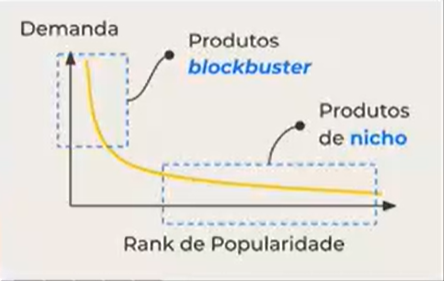

O que deve ser perguntado então é como uma empresa consegue filtrar os produtos mais compatíveis com o perfil de consumo dos usuários? É justamente os sistemas de recomendação a resposta para essa pergunta.

Um dos elementos principais de Sistemas de Recomendações é a matriz de preferências, que basicamente relaciona a entidade **usuário** com a entidade **item** através de um sinal de feedback.

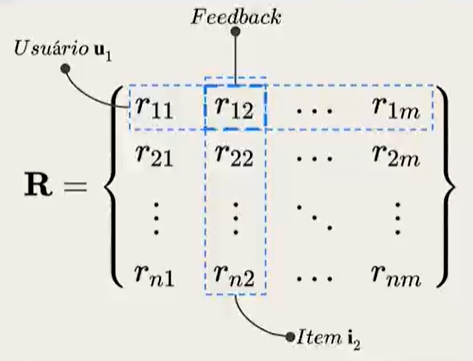

Esses sinais de feedback tem dois tipos distintos:


. Feedback explícito: Registro intencional do usuário sobre sua preferência: Curtidas, ou então notas de 1 a 5. Sinal de difícil obtenção, nem todas interfaces possuem esse tipo de emcanismo para o usuário dar nota dele para um determinado item e nem todo usuário tem esse costume de dar notas para os itens que ele têm preferência. A exemplo de um filme da netflix que a pessoa assiste, mas passam semanas, meses e ela ainda não avaliou. Logo, esse tipo de feedback é um pouco mais difícil de obter e ele cria uma matriz altamente esparsa, ou seja, uma matriz com poucos dados ou poucas entradas preenchidas. Uma vantagem é que ele trás um alta qualidade na preferência do usuário.


. Feedback Implícito: Coletado através da navegação do usuário, uma das ferramentas que utiliza bastante esse modelo é o google analitics, que é usado para ver como é o padrão de consumo do usuário em uma determinada página web. Ele é de fácil obtenção, sinal de consumo near real time. Mas tem como desvantagens que o sinal é ruidoso e possuem uma baixa qualidade na preferência do usuário.



# Matriz de Similaridades #

Indica o grau de similaridade entre 2 entidades (itens ou usuários) a partir dos metadados ou dos consumos.
Empresas como netflix e globoplay sempre têm uma aba indicando filmes ou séries similares.


# Seed para uma recomendação #

É quando se utiliza um determinado item base para a recomendação de outros itens.

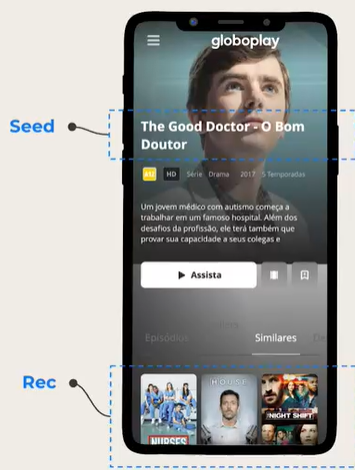


Imagina que uma pessoa acessou a página da série The Good Doctor, logo a plataforma irá fazer suas recomendações baseadas na The Good Doctor que é a aba de similares. É possível ver também em items parecidos com algo, muito usado em e-commerce ou quando a pessoa compra algum item, são todos os exemplos de ofertas que se baseou em outro item como seed.


# Topologias de Sistemas de Recomendações:

1. Recomendação Não Personalizada

2. Recomendação Content-Based

3. Recomendação Filtragem Colaborativa

4. Recomendação híbrida


1- Recomendação Não Personalizada é caracterizada por fazer a mesma recomendação para todos os usuários, como se fosse uma transmissão única para todos os usuários. Geralmente utiliza-se esse método quando se tem um usuário que acabou de entrar no sistema e a empresa não tem dados sobre esse usuário. Com isso, a recomendação demora um tempo em relação a qualidade, uma vez que inicialmente não se sabe nada sobre o usuário(cold-start).

Além disso, ela também é de rápida atualização (streaming). Sendo usado bastante em pipeline de streaming, exemplo: Saber quais filmes mais assistidos ou as matérias que estão sendo mais acessadas.

Baixa complexidade, não considera o perfil de consumo.



2- Recomendação Content-Basead

Foco é nas features dos itens, ou seja, pega um usário e ver quais são os itens que esse usuário consumiu e tenta achar itens parecidos com que esse usuário consumiu. Assim como demora a fazer recomendação de qualidado ao um novo usuário, o item tem também um cold start, geralmente precisa que usuários suficientes consumam esse item para que ele comece a ser recomendado. O content-basead não sofre disso pois só é preciso extrair as features dos itens para que o mesmo comece a ser recomendado.

Alta explicapilidade, o usuário quando entende a razão daquela recomendação passa a confiar muito mais na recomendação.

Possui como limitação a extrção de features, pois nem sempre o item tem uma extração fácil das suas features.

Outra característica não muito desejada é o efeito bolha, se está considerando que o usuário assistiu e está desconsiderando o consumo de outros usuários. A tendência é que se mantenha usuário numa bolha de consumo.


3- Recomendação Filtragem Colaborativa

Foco nos sinais de feedback dos usuários, filtrando por usuários que tem consumos similares e agrupando para fazer a recomendação. Possui bom desempenho e baixa explicabiliadde, não consegue explicar bem a razão pela qual aquela recomendação está indo para o usuário.

Sofre bastante com a esparsidade, geralmente um usuário não consome todo catálogo e ai se cria uma matriz altamente esparsa, e os filtros colaborativos sofrem vastante com os efeitos dessas esparsidades. Mesmo assim ainda conseguem ter um desempenho satisfatório.

Outra característica dos filtros colaborativos é a alta serendipidade, o usuário recebe algo que não esperava.

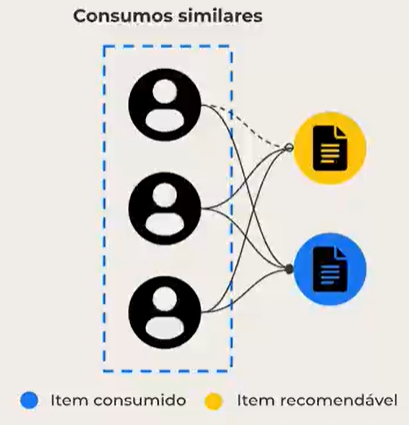



4- Recomendação Híbrida: Combina a saída de diferentes topologias, pode-se ter uma saída de uma recomendação não personalizada misturada com a recomendação baseada em conteúdo e também com a saída de filtragem colaborativa.


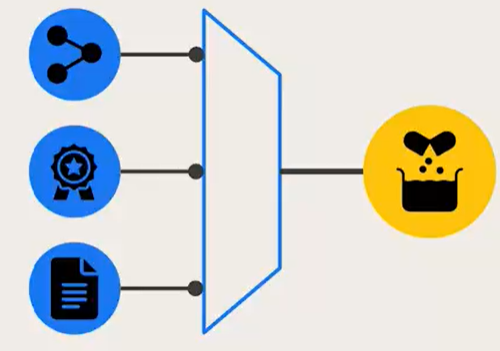

Tem uma maior complexidade de implantação, como se fosse um metamodelo, ou seja, tem-se um modelo em cima de outro modelo, geralmente se cria uma camada de complexidade alta para se manter o algoritmo para explicar a recomendação.

Tem mais hiperparâmetros para se configurar, ou seja, vai possuir hiperparâmetros do mix de recomendação e também os parâmetros dos algoritmos base que se usa para fazer a recomendação híbrida.

## 1. Prática

# 1.1.  Importando Bibliotecas #

In [46]:
import os
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#007efd', '#FFC000', '#303030'])


In [47]:
%%time
_ = files.upload() # approx: 1min8s

Saving movies.parquet to movies (2).parquet
Saving ratings.parquet to ratings (2).parquet
Saving users.parquet to users (2).parquet
CPU times: user 884 ms, sys: 117 ms, total: 1 s
Wall time: 1min 16s


In [48]:
df_ratings = pd.read_parquet('ratings.parquet')
df_ratings.tail()

,user_id,item_id,rating,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [49]:
df_users = pd.read_parquet('users.parquet')
df_users.tail()

,user_id,gender,age,occupation,zip_code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [50]:
df_movies = pd.read_parquet('movies.parquet')
df_movies.tail()

,item_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


# 1.2. Pré-Processamento #

 A partir do carregamento dos arquivos, faremos as seguintes transformações:



1.   extrair a data do campo timestamp,
2.   extrair o ano de lançamento do filme a partir do seu título,
3.   converter a string concatenada de gêneros em lista de gêneros


Primeiro, será feita a extração da data. Será usada duas formas para isso. A primeira sem a função e a segunda com a função.

In [51]:
df_ratings['date'] =  pd.to_datetime(df_ratings['timestamp'], unit='s').dt.date
df_ratings.tail()

,user_id,item_id,rating,timestamp,date
1000204,6040,1091,1,956716541,2000-04-26
1000205,6040,1094,5,956704887,2000-04-25
1000206,6040,562,5,956704746,2000-04-25
1000207,6040,1096,4,956715648,2000-04-26
1000208,6040,1097,4,956715569,2000-04-26


In [52]:
from datetime import datetime
def convert_timestamp_to_date(timestamp:int):
  return datetime.fromtimestamp(timestamp).date()
df_ratings['date'] =  df_ratings['timestamp'].apply(convert_timestamp_to_date)
df_ratings.tail()

,user_id,item_id,rating,timestamp,date
1000204,6040,1091,1,956716541,2000-04-26
1000205,6040,1094,5,956704887,2000-04-25
1000206,6040,562,5,956704746,2000-04-25
1000207,6040,1096,4,956715648,2000-04-26
1000208,6040,1097,4,956715569,2000-04-26


In [53]:
import re

def extract_year(movie_name):
    """
    Extrai o ano de lançamento de um filme a partir de uma string contendo o nome do filme e o ano em parênteses.
    """
    year = re.findall(r'\((\d{4})\)', movie_name)
    if year:
        return int(year[0])
    else:
        return None
df_movies['year'] = df_movies['title'].apply(extract_year)
df_movies.tail()

,item_id,title,genres,year
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [54]:
def extract_genres(genre_string):
    """
    Extrai uma lista de gêneros de uma string com vários gêneros separados por '|'.
    """
    genres = genre_string.split('|')
    genres = list(map(str.strip, genres))
    return genres
df_movies['genres_list'] = df_movies['genres'].apply(extract_genres)

In [55]:
df_movies

,item_id,title,genres,year,genres_list
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,[Comedy]
3879,3949,Requiem for a Dream (2000),Drama,2000,[Drama]
3880,3950,Tigerland (2000),Drama,2000,[Drama]
3881,3951,Two Family House (2000),Drama,2000,[Drama]


# Distribuição de Dados Categóricos

A função plot_category_count abaixo auxilia na visualização de contagem dos dados categóricos. Como o campo rating é um inteiro no intervalo [1,5], podemos considerar este campo também uma categoria.

In [56]:
def plot_category_count(category:pd.Series, figsize = (16,8)):
  """ Categorias como index"""
  fig, ax = plt.subplots(figsize = figsize)
  ax.barh(category.index, category.values)
  ax.grid(True, linestyle =  '--')
  ax.set_xlabel('Count')
  return fig, ax

In [57]:
genres = (
    df_movies.explode('genres_list')
)
genres


,item_id,title,genres,year,genres_list
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
...,...,...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama,2000,Drama
3880,3950,Tigerland (2000),Drama,2000,Drama
3881,3951,Two Family House (2000),Drama,2000,Drama
3882,3952,"Contender, The (2000)",Drama|Thriller,2000,Drama


In [58]:
genres = (
    df_movies.explode('genres_list')
    .groupby('genres_list')
    .count()['item_id']
    .sort_values(ascending = False)
)
genres


genres_list
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
Name: item_id, dtype: int64

(<Figure size 1600x800 with 1 Axes>, <Axes: xlabel='Count'>)

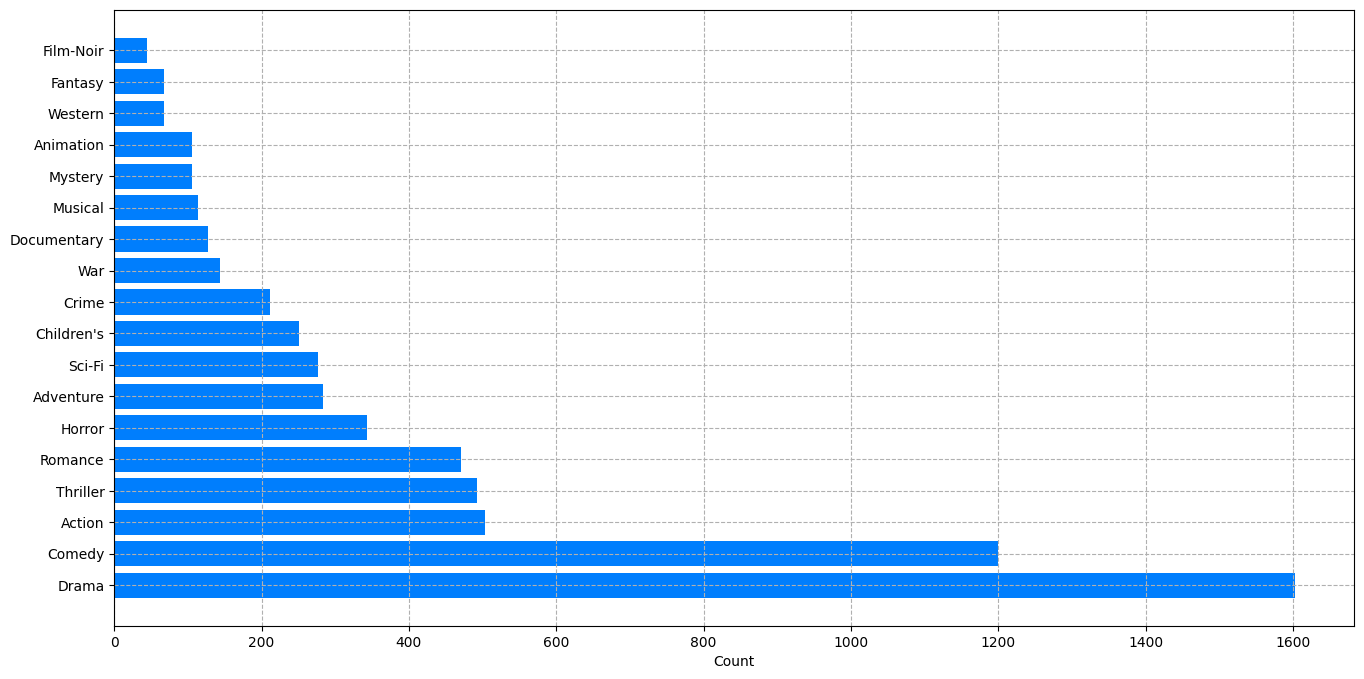

In [59]:
plot_category_count(genres)

In [60]:
ratings = df_ratings.groupby('rating').count()['user_id']
ratings

rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: user_id, dtype: int64

(<Figure size 1600x800 with 1 Axes>, <Axes: xlabel='Count'>)

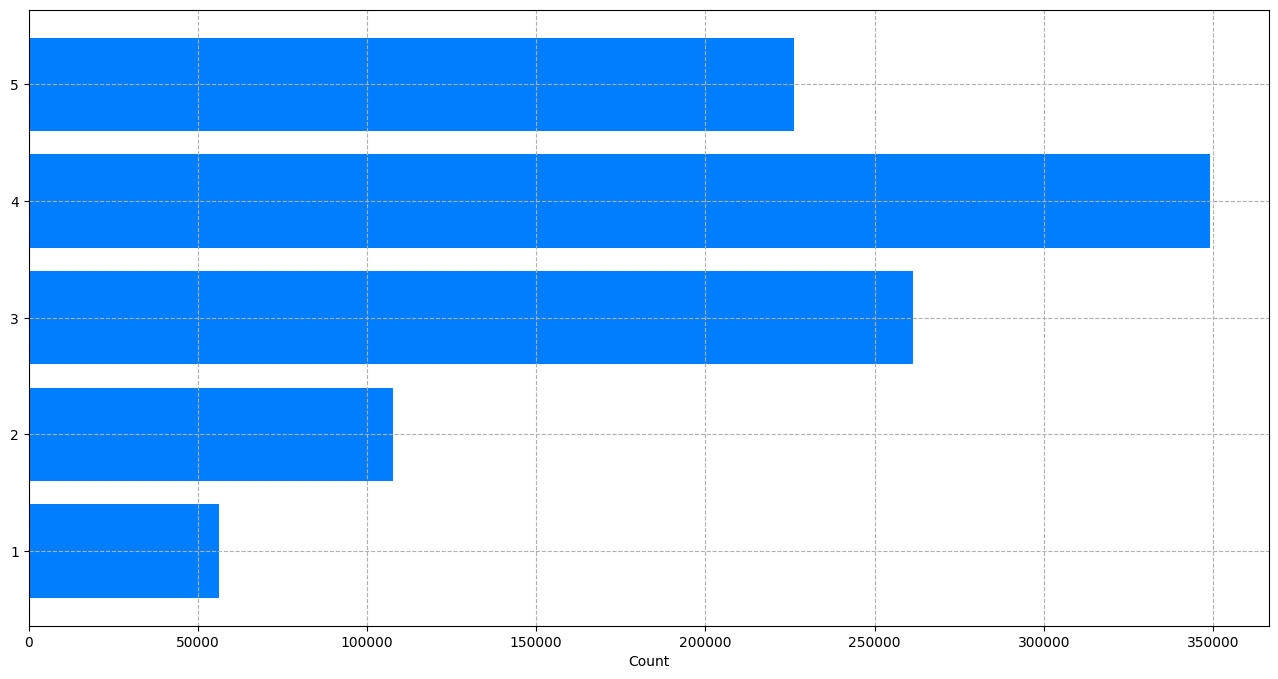

In [61]:
plot_category_count(ratings)

# Evolução Temporal das Avaliações

A função plot_daily_ratings nos auxilia a visualizar quantas avaliações foram dadas diariamente e como é evolução dessas avaliações ao longo do tempo.

(<Figure size 1600x800 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Number of ratings'>)

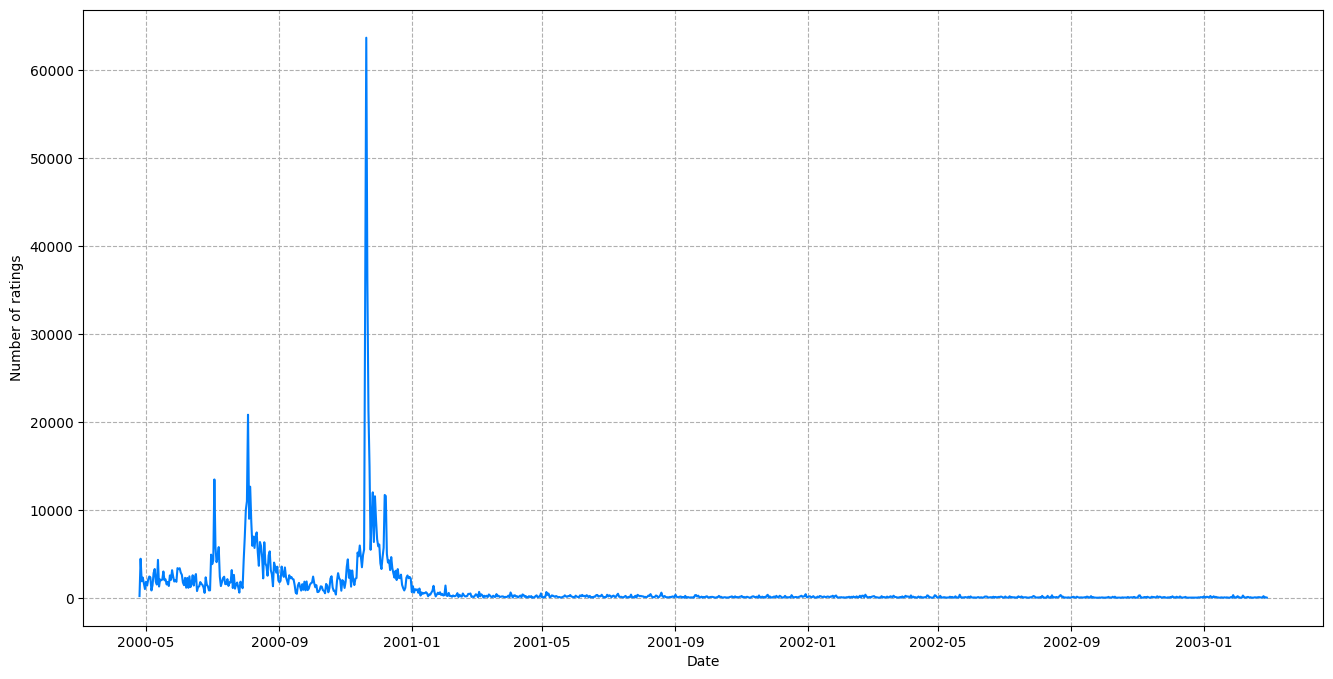

In [62]:
def plot_daily_ratings(daily_ratings:pd.Series, figsize = (16,8)):
  fig, ax = plt.subplots(figsize = figsize)
  ax.plot(daily_ratings)
  ax.set_xlabel('Date')
  ax.set_ylabel('Number of ratings')
  ax.grid(True, linestyle = '--')
  return fig,ax

daily_ratings = df_ratings.groupby('date').count()['user_id'].sort_index(ascending = False)
plot_daily_ratings(daily_ratings)

#Esparsidade

Grau que indica o quanto de informação está faltando para se entender o usuário

#Esparsidade Geral (Overall Sparsity)

A overall sparsity (OS) pode ser calculada como

OS = 1 - #ratings/(#users x #items)

. Poucas avaliações preenchiadas: OS próximo de 100%, alta esparsidade
. Muitas avalições preenchidas OS perto de 0% (baixa esparsidade)



In [63]:
n_users = df_users['user_id'].nunique()
n_items = df_movies['item_id'].nunique()
# Removendo não as linhas duplicadas e sim as repetições de avalição de um mesmo item por um mesmo usuário, ou seja removeu-se as avaliações que foram feitas mais de uma vez por um mesmo usuário. 
n_ratings = df_ratings[['user_id','item_id']].drop_duplicates().shape[0]

In [64]:
overall_sparsity = 1- n_ratings / (n_users * n_items)
print('Overall Sparsity: {:.02f} %'.format(100*overall_sparsity))

Overall Sparsity: 95.74 %


A matriz de preferências pode ser calculada da seguinte forma:


In [65]:
df_preferences = df_ratings.pivot(
    index = 'user_id',
    columns = 'item_id',
    values = 'rating'
)

df_preferences.tail()

item_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Preenchendo os valores nulos 
df_preferences = df_preferences.fillna(0)
df_preferences.tail()

item_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
6036,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A função plot_reference_matrix nos auxilia a visualizar a esparsidade da matriz de preferências.

(<Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'Preference Matrix (Overall Sparsity 95.74 %)'}, xlabel='Users', ylabel='Items'>)

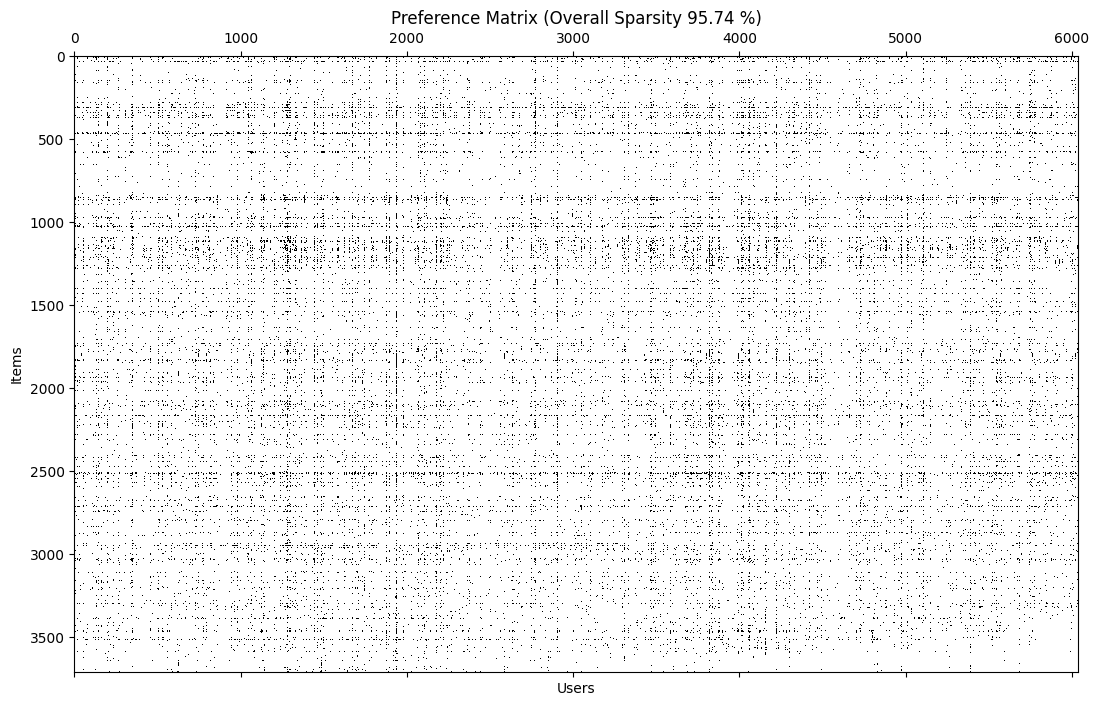

In [68]:
def plot_preference_matrix(df_preferences: pd.DataFrame, sparsity:float, figsize =(16,8)):
  fig, ax = plt.subplots(figsize = figsize)
  ax.spy(df_preferences.values.T)
  ax.set_ylabel('Items')
  ax.set_xlabel('Users')
  ax.set_title('Preference Matrix (Overall Sparsity {:.02f} %)'.format(100*sparsity))

  return fig, ax

plot_preference_matrix(df_preferences, overall_sparsity)

# Esparsidade Específica de Usuário/Item

De forma análoga à overall sparsity, também pode-se calcular a User Specific Sparsisty (USS) e a Item Specific Sparsity (ISS) da seguinte forma:

USS(u) = 1 - #ratings(u)/#items

ISS(i) = 1- #ratings(i)/#users

Usuário com poucas avaliações USS próximo de 100%
Itens com muitas avaliações ISS próximo de 0%.


In [69]:
users_ratings = df_ratings.groupby('user_id').count()['item_id']

In [70]:
users_ratings

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: item_id, Length: 6040, dtype: int64

In [71]:
users_sparsity = 1 - users_ratings / n_items
users_sparsity


user_id
1       0.986351
2       0.966778
3       0.986866
4       0.994592
5       0.949008
          ...   
6036    0.771311
6037    0.947978
6038    0.994849
6039    0.968323
6040    0.912181
Name: item_id, Length: 6040, dtype: float64

In [73]:
item_ratings = df_ratings.groupby('item_id').count()['user_id']

In [74]:
item_ratings

item_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: user_id, Length: 3706, dtype: int64

In [77]:
items_sparsity =  1- item_ratings / n_users

In [79]:
items_sparsity

item_id
1       0.656126
2       0.883940
3       0.920861
4       0.971854
5       0.950993
          ...   
3948    0.857285
3949    0.949669
3950    0.991060
3951    0.993377
3952    0.935762
Name: user_id, Length: 3706, dtype: float64

# Em geral, os itens de menor esparsidade são os Blockbuster

In [81]:
item_ids = items_sparsity[:3].index
df_movies[df_movies['item_id'].isin(item_ids)]

,item_id,title,genres,year,genres_list
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"


In [103]:
def plot_sparsity_distribution(sparsity, ylabel):
  fig, ax = plt.subplots()
  ax.grid(True, linestyle = '--')
  ax.hist(100*sparsity)
  ax.set_ylabel(ylabel)
  ax.set_xlabel('Sparsity')
  return fig,ax

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Sparsity', ylabel='Users'>)

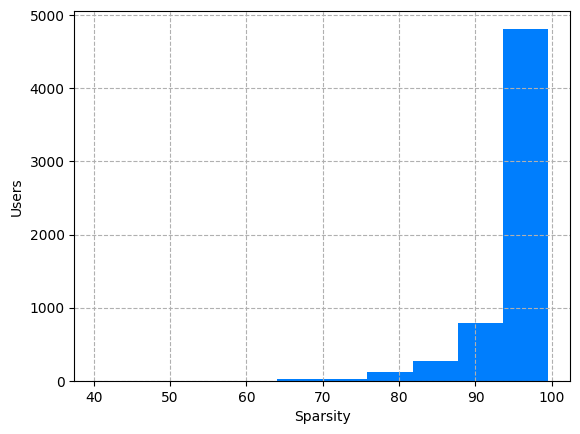

In [104]:
plot_sparsity_distribution(users_sparsity, ylabel='Users')

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Sparsity', ylabel='Users'>)

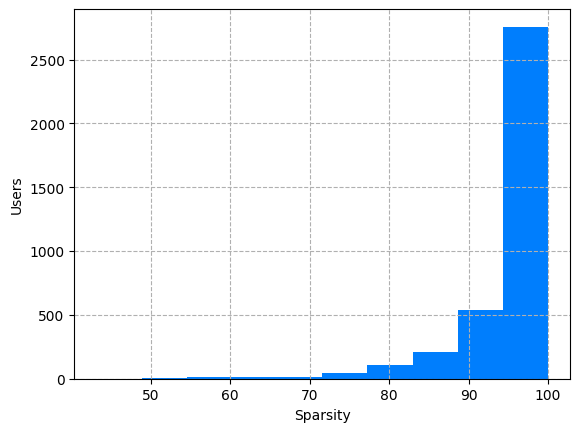

In [106]:
plot_sparsity_distribution(items_sparsity, ylabel='Users')

# Referências de Sistema de Recomendação

- RECSYS e SIGIR: Conferências que possuem como sponsors grandes empresas como google, Netflix, etc.

- Artigos informais da netflix, spotify e google.

-Frameworks em python (RecBole, Nvidia,Surprise, Spark, TensorFlow)